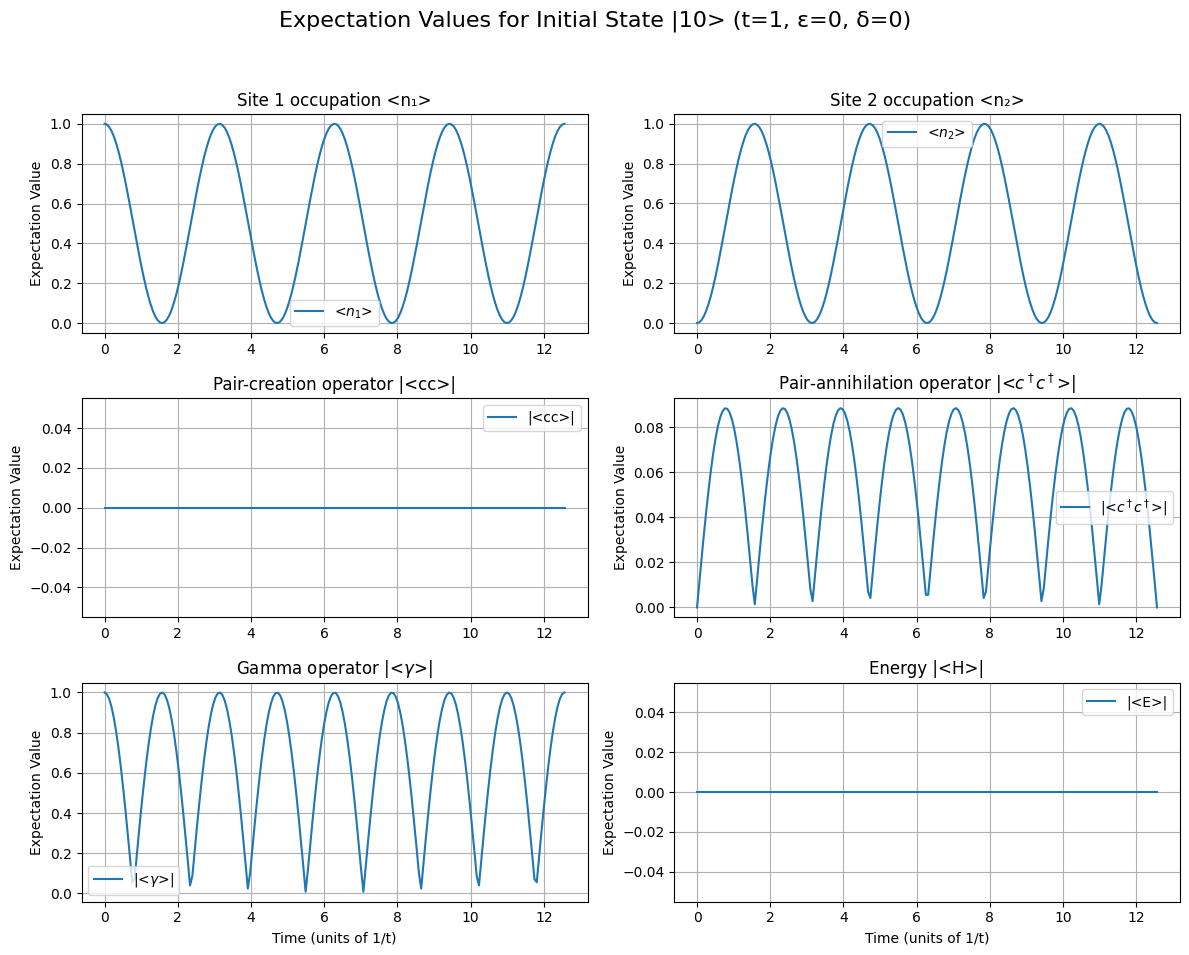

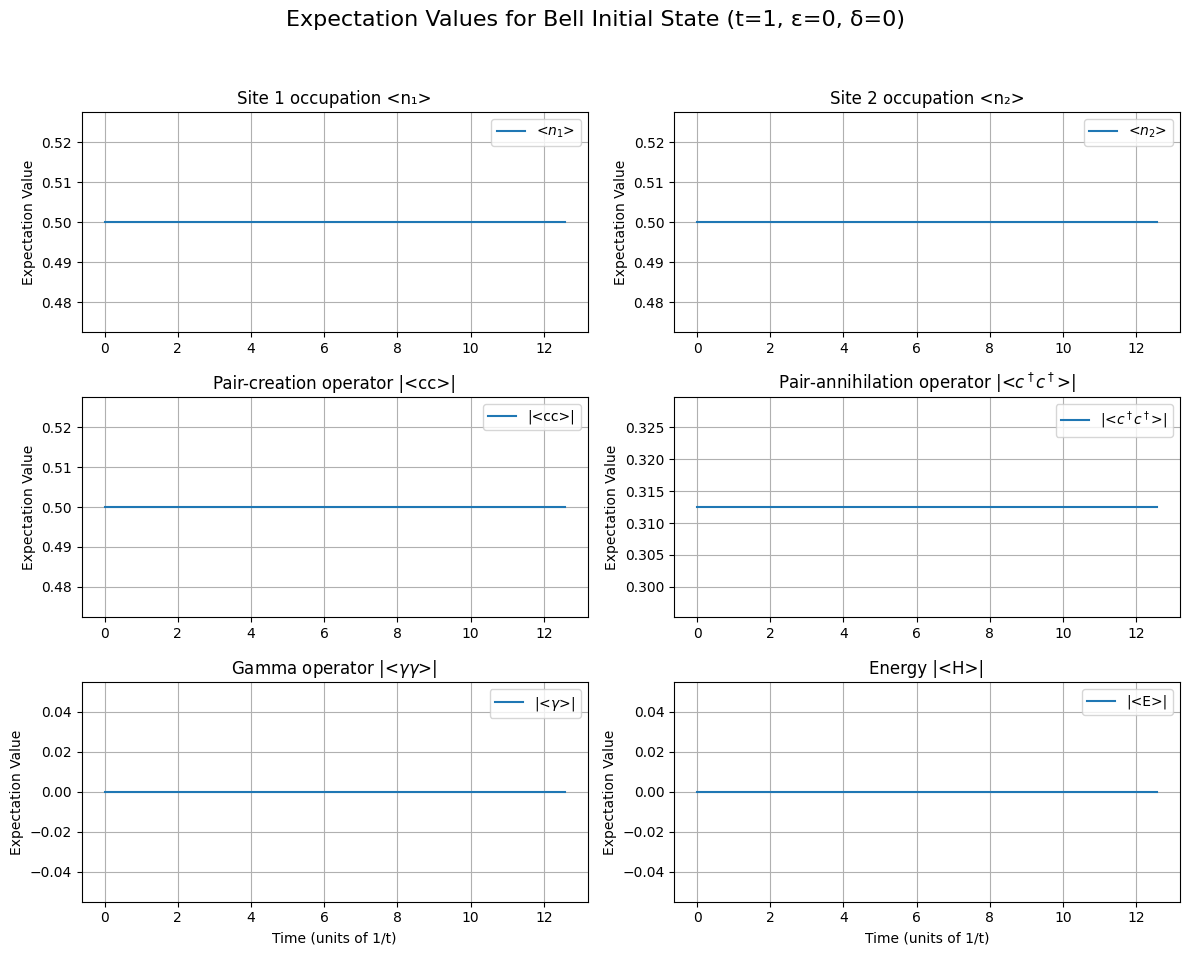

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Define gates
I = np.array([[1, 0],
              [0, 1]], dtype=complex)
X = np.array([[0, 1],
              [1, 0]], dtype=complex)
Y = np.array([[0, -1j],
              [1j, 0]], dtype=complex)
Z = np.array([[1, 0],
              [0, -1]], dtype=complex)
ket_0 = np.array([[1],
                  [0]], dtype=complex) # ket |0>
ket_1 = np.array([[0],
                  [1]], dtype=complex) # ket |1>

# Define Initial States
# Bell state: (1/sqrt(2)) * (|00> + |11>)
initial_state_bell = (1/np.sqrt(2))*np.kron(ket_0,ket_0) + (1/np.sqrt(2))*np.kron(ket_1,ket_1)
# Product state: |10>
initial_state_10 = np.kron(ket_1,ket_0)

# Parameters
eps = 0  # On-site energy difference parameter
t = 1    # Hopping strength (set to 1 to observe dynamics)
delta = 1 # Asymmetry in hopping

# Time vector for plotting
# We will plot from time 0 to 4*pi
time_vec = np.linspace(0, 4 * np.pi, 600) # 200 points for a smooth curve

# Hamiltonian
# H = (eps/2)*(I_I - I_Z) + (eps/2)*(I_I - Z_I) + ((t+delta)/2)*X_X + ((t-delta)/2)*Y_Y
H_analytical = (eps/2)*(np.kron(I, I) - np.kron(I, Z)) \
             + (eps/2)*(np.kron(I, I) - np.kron(Z, I)) \
             + ((t+delta)/2)*np.kron(X, X) \
             + ((t-delta)/2)*np.kron(Y, Y)

# Operators for expectation values
# n_is1: Occupation of site 1 (0.5 * (I - Z_I))
n_is1 = (1/2)*(np.kron(I, I) - np.kron(Z, I))
# n_is2: Occupation of site 2 (0.5 * (I - I_Z))
n_is2 = (1/2)*(np.kron(I, I) - np.kron(I, Z))
# cc_op: Pair creation operator like term
cc_op = (-0.25*np.kron(X,X)-0.25j*np.kron(X,Y)-0.25j*np.kron(Y,X) + 0.25*np.kron(Y,Y))
# cc_dagger_op: Pair annihilation operator like term
cc_dagger_op = 0.25*(np.kron(X,X)-0.25j*np.kron(X,Y)-0.25*np.kron(Y,X) -0.25*np.kron(Y,Y)) # Corrected pre-factor based on typical definitions if it's adjoint of cc_op
# gamma_op: Phase-related operator
gamma_op = 1j*(np.kron(Z,I))

# Lists to store expectation values for ket_10 initial state
n1_10_vals, n2_10_vals, c_10_vals, c_dag_10_vals, gamma_10_vals, E_10_vals = [], [], [], [], [], []

# Lists to store expectation values for bell_state initial state
n1_bell_vals, n2_bell_vals, c_bell_vals, c_dag_bell_vals, gamma_bell_vals, E_bell_vals = [], [], [], [], [], []

# Time evolution loop
for time_step in time_vec:
    # Calculate the time evolution operator U = exp(-iHt)
    U_analytical = expm(-1.0j * H_analytical * time_step)

    # Evolve ket_10 state
    current_final_state_10 = U_analytical @ initial_state_10
    # Calculate and store expectation values for ket_10
    # Note: Expectation value is <psi|O|psi>. Result is a 1x1 matrix, so we take [0,0] element.
    n1_10_vals.append(np.abs(current_final_state_10.conj().T @ n_is1 @ current_final_state_10)[0,0])
    n2_10_vals.append(np.abs(current_final_state_10.conj().T @ n_is2 @ current_final_state_10)[0,0])
    c_10_vals.append(np.abs(current_final_state_10.conj().T @ cc_op @ current_final_state_10)[0,0])
    c_dag_10_vals.append(np.abs(current_final_state_10.conj().T @ cc_dagger_op @ current_final_state_10)[0,0])
    gamma_10_vals.append(np.abs(current_final_state_10.conj().T @ gamma_op @ current_final_state_10)[0,0])
    E_10_vals.append(np.abs(current_final_state_10.conj().T @ H_analytical @ current_final_state_10)[0,0])

    # Evolve bell_state
    current_final_state_bell = U_analytical @ initial_state_bell
    # Calculate and store expectation values for bell_state
    n1_bell_vals.append(np.abs(current_final_state_bell.conj().T @ n_is1 @ current_final_state_bell)[0,0])
    n2_bell_vals.append(np.abs(current_final_state_bell.conj().T @ n_is2 @ current_final_state_bell)[0,0])
    c_bell_vals.append(np.abs(current_final_state_bell.conj().T @ cc_op @ current_final_state_bell)[0,0])
    c_dag_bell_vals.append(np.abs(current_final_state_bell.conj().T @ cc_dagger_op @ current_final_state_bell)[0,0])
    gamma_bell_vals.append(np.abs(current_final_state_bell.conj().T @ gamma_op @ current_final_state_bell)[0,0])
    E_bell_vals.append(np.abs(current_final_state_bell.conj().T @ H_analytical @ current_final_state_bell)[0,0])

# Plotting for ket_10 initial state
plt.figure(figsize=(12, 10)) # Adjusted figure size for better layout
plt.suptitle('Expectation Values for Initial State |10> (t=1, ε=0, δ=0)', fontsize=16)

# Plot for <n_1>
plt.subplot(3, 2, 1)
plt.plot(time_vec, n1_10_vals, label=r'<$n_1$>')
plt.ylabel('Expectation Value')
plt.title('Site 1 occupation <n₁>')
plt.grid(True)
plt.legend()

# Plot for <n_2>
plt.subplot(3, 2, 2)
plt.plot(time_vec, n2_10_vals, label=r'<$n_2$>')
plt.ylabel('Expectation Value')
plt.title('Site 2 occupation <n₂>')
plt.grid(True)
plt.legend()

# Plot for |<c_c>|
plt.subplot(3, 2, 3)
plt.plot(time_vec, c_10_vals, label='|<cc>|')
plt.ylabel('Expectation Value')
plt.title('Pair-creation operator |<cc>|')
plt.grid(True)
plt.legend()

# Plot for |<c_c_dag>|
plt.subplot(3, 2, 4)
plt.plot(time_vec, c_dag_10_vals, label=r'|<$c^\dagger c^\dagger$>|')
plt.ylabel('Expectation Value')
plt.title(r'Pair-annihilation operator |<$c^\dagger c^\dagger$>|')
plt.grid(True)
plt.legend()

# Plot for |<gamma>|
plt.subplot(3, 2, 5)
plt.plot(time_vec, gamma_10_vals, label=r'|<$\gamma$>|')
plt.xlabel('Time (units of 1/t)')
plt.ylabel('Expectation Value')
plt.title(r'Gamma operator |<$\gamma$>|')
plt.grid(True)
plt.legend()

# Plot for |<E>| (Energy)
plt.subplot(3, 2, 6)
plt.plot(time_vec, E_10_vals, label='|<E>|')
plt.xlabel('Time (units of 1/t)')
plt.ylabel('Expectation Value')
plt.title('Energy |<H>|')
plt.grid(True)
plt.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()


# Plotting for Bell state initial state
plt.figure(figsize=(12, 10)) # Adjusted figure size for better layout
plt.suptitle('Expectation Values for Bell Initial State (t=1, ε=0, δ=0)', fontsize=16)

# Plot for <n_1>
plt.subplot(3, 2, 1)
plt.plot(time_vec, n1_bell_vals, label=r'<$n_1$>')
plt.ylabel('Expectation Value')
plt.title('Site 1 occupation <n₁>')
plt.grid(True)
plt.legend()

# Plot for <n_2>
plt.subplot(3, 2, 2)
plt.plot(time_vec, n2_bell_vals, label=r'<$n_2$>')
plt.ylabel('Expectation Value')
plt.title('Site 2 occupation <n₂>')
plt.grid(True)
plt.legend()

# Plot for |<c_c>|
plt.subplot(3, 2, 3)
plt.plot(time_vec, c_bell_vals, label='|<cc>|')
plt.ylabel('Expectation Value')
plt.title(r'Pair-creation operator |<cc>|')
plt.grid(True)
plt.legend()

# Plot for |<c_c_dag>|
plt.subplot(3, 2, 4)
plt.plot(time_vec, c_dag_bell_vals, label=r'|<$c^\dagger c^\dagger$>|')
plt.ylabel('Expectation Value')
plt.title(r'Pair-annihilation operator |<$c^\dagger c^\dagger$>|')
plt.grid(True)
plt.legend()

# Plot for |<gamma>|
plt.subplot(3, 2, 5)
plt.plot(time_vec, gamma_bell_vals, label=r'|<$\gamma$>|')
plt.xlabel('Time (units of 1/t)')
plt.ylabel('Expectation Value')
plt.title(r'Gamma operator |<$\gamma \gamma$>|')
plt.grid(True)
plt.legend()

# Plot for |<E>| (Energy)
plt.subplot(3, 2, 6)
plt.plot(time_vec, E_bell_vals, label='|<E>|')
plt.xlabel('Time (units of 1/t)')
plt.ylabel('Expectation Value')
plt.title('Energy |<H>|')
plt.grid(True)
plt.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()
